# Completer Roadmap to prepare ML

1. Programming Language
> * Python or R
2. Exploratory Data Analysis
>
3. Feature Engineering
> * EDA
> * Handling Missing Values
> * Handling Outliers
> * Categorical Encoding
> * Normalization and Standardization

4. Feature Selection
> * Correlation
> * Forward Elimination
> * Backward Elimination
> * Univariate Selection
> * RandomForest Importance
> * Feature selection with Decision Tree

5. ML Algorithms - Regression , Classification , Clustering
> * Linear Regression
> * Logistic Regression
> * Decision Tree
> * RandomForest 
> * KNN
> * Xgboost
> * SVM
> * Kmeans
> * DBSCAN

6. Hyper parameterTuning
> * GridSearch 
> * RandomizedSearch
> * Hyperopt
> * Optuna
> * Genetics Algorithms

7. Dockers and Kubernetes
>
8. Model Deployment
>
9. End to End ML Projects
>

### Libraries :
1. Numpy 
2. Pandas
3. Matplotlib
4. Seaborn 
5. SkLearn
6. Scipy
7. Dask

### Web Frameworks :
1. Flask
2. Django

# Statistics

__Basics Stats :__

Probability
1. Introduction to Basic Terms
2. Variables
3. Random Variables
4. Population,Sample,Population Mean,
   Sample Mean
5. Population Distribution, Sample Distribution 
   and Sampling Distribution
6. Mean, Median ,Mode
7. Range
8. Measure Of Dispersion
9. Variance
10. Standard Deviation
11. Gaussian/Normal Distribution

__Intermediate Stats :__

12. Standard Normal Distribution
13. Z score
14. Probability Density Function
15. Cumulative distribution function
16. Hypothesis Testing
17. Many different plotting graphs
18. Kernel Density Estimation
19. Central Limit Theorem
20. Skewness of Data
21. Covariance 
22. Pearson Correlation Coefficient
23. Spearman Rank Correlation Coefficient
24. Importance of Correlation
25. Hypothesis Testing
26. Null Hypothesis 
27. Alternative Hypothesis
28. Understanding Hypothesis testing
29. (T-test,Chi square test, p values)

__Advanced Stats :__

21. Q-Q plot
22. Chebyshev’s inequality
23. Discrete And Continuous Distribution
24. Bernoulli And Binomial Distribution
25. Log Normal Distribution
26. Power Law Distribution
27. Box Cox Tranform
28. Poisson Disstribution
29. Application Of Non Gaussian Distribution

# Exploratory Data Analysis

### Univariate , Bivariate and Multivariate Analysis :

* Bell curve is also known as probability density function

In [7]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set()

df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
print('Shape :',df.shape)

Shape : (150, 5)


__Univariate Analysis :__

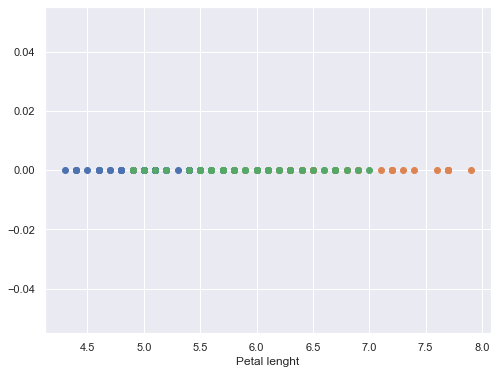

In [28]:
plt.figure(figsize=(8,6))
df_setosa = df.loc[df['species']=='setosa']
df_virginica = df.loc[df['species']=='virginica']
df_versicolor = df.loc[df['species']=='versicolor']

plt.plot(df_setosa['sepal_length'],np.zeros_like(df_setosa['sepal_length']),'o')
plt.plot(df_virginica['sepal_length'],np.zeros_like(df_virginica['sepal_length']),'o')
plt.plot(df_versicolor['sepal_length'],np.zeros_like(df_versicolor['sepal_length']),'o')
plt.xlabel('Petal lenght');

__Bivariate Analysis :__

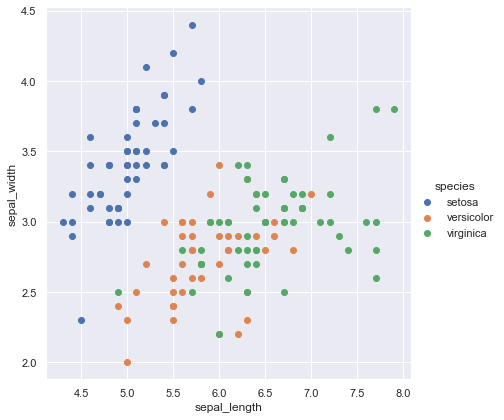

In [40]:
sns.FacetGrid(df,hue='species',size=6).map(plt.scatter,'sepal_length','sepal_width').add_legend();

__Multivatiate Analysis :__

D:\Tensorflow\py3-TF2\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


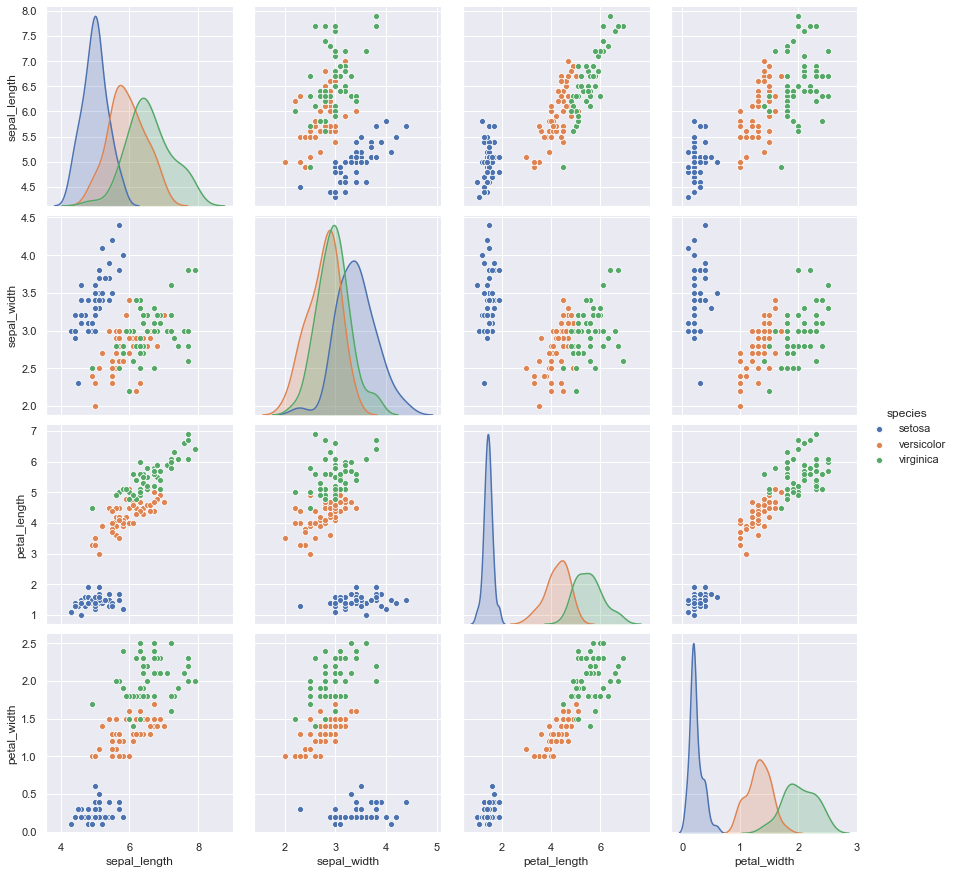

In [38]:
sns.pairplot(df,hue='species',size=3);

### Z-Score Statistics

__Gaussian Normal Distribition :__
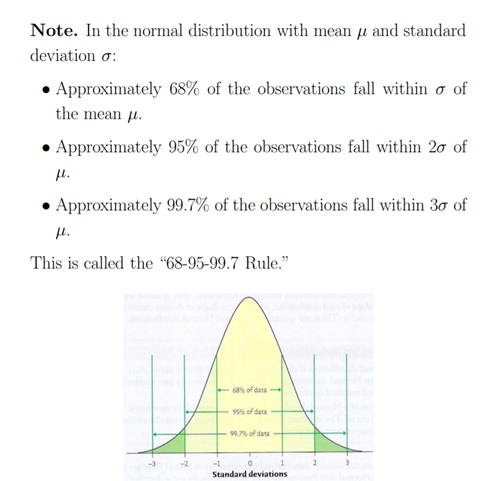

__Z-Score Formula :__
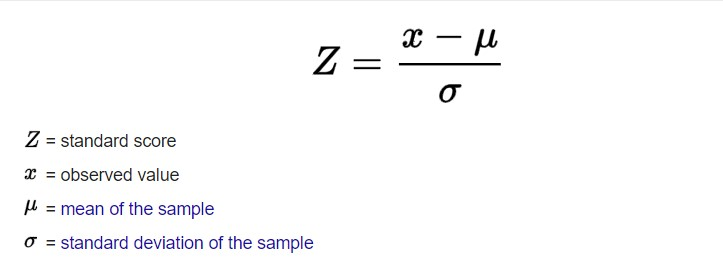

__Z-Score Table :__
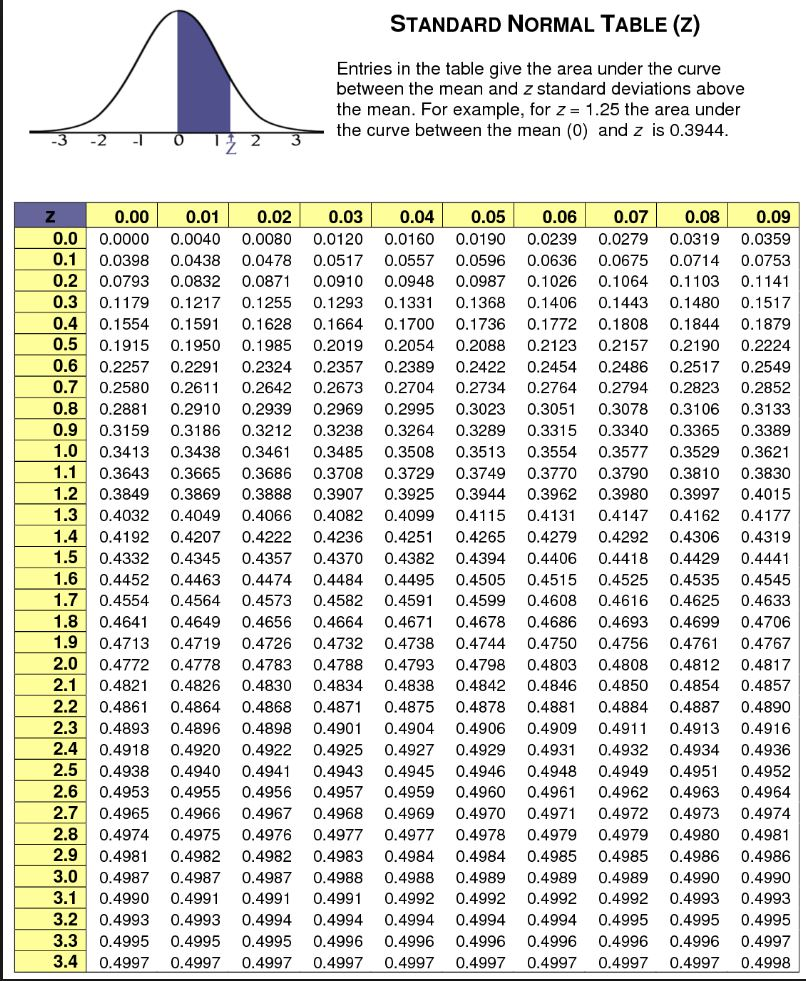

### Probability Density Function (PDF)

* Here we smoothen the histogram
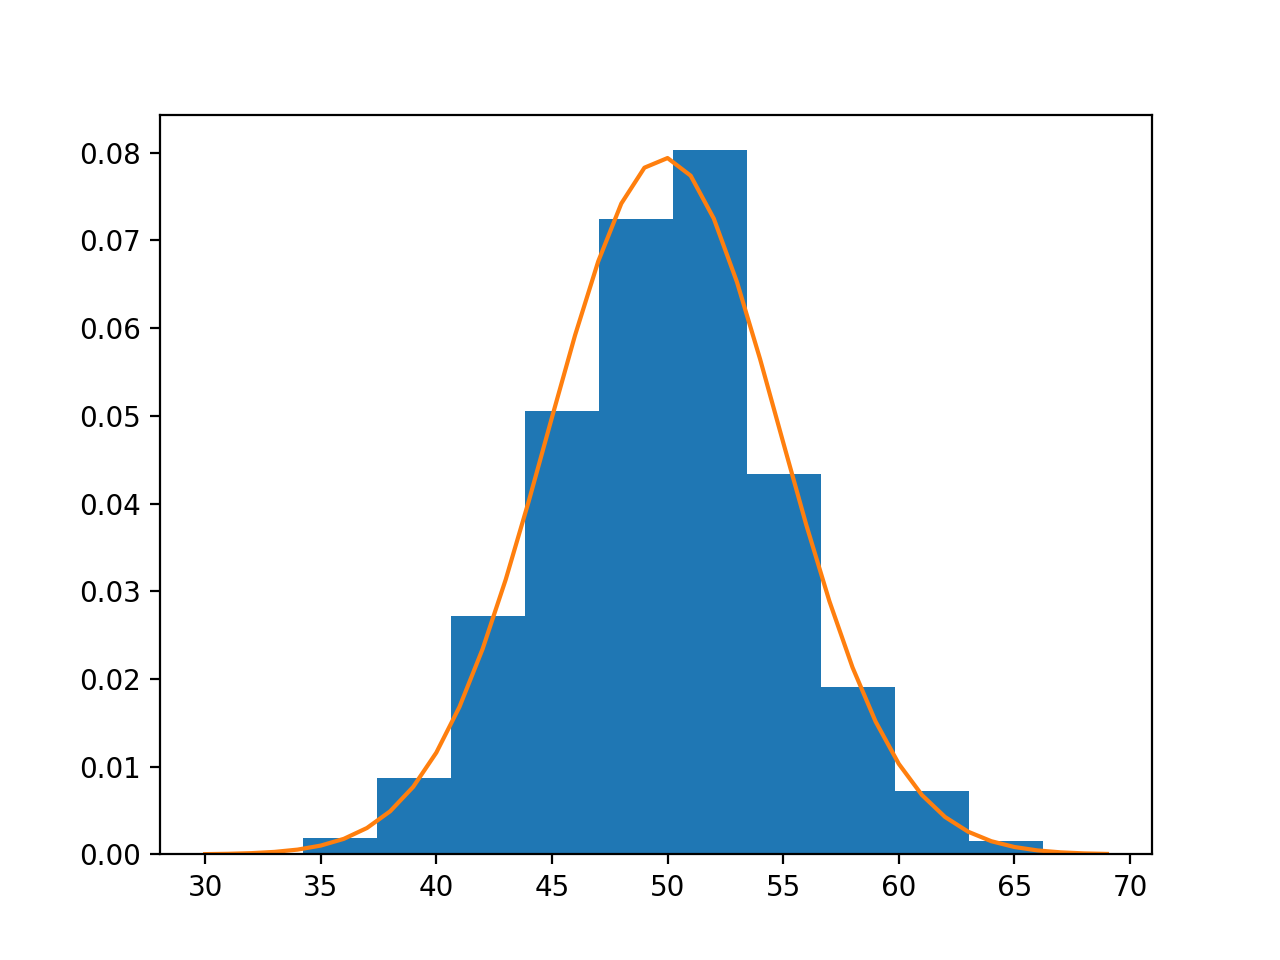

### Cumulative Density Function (CDF) 

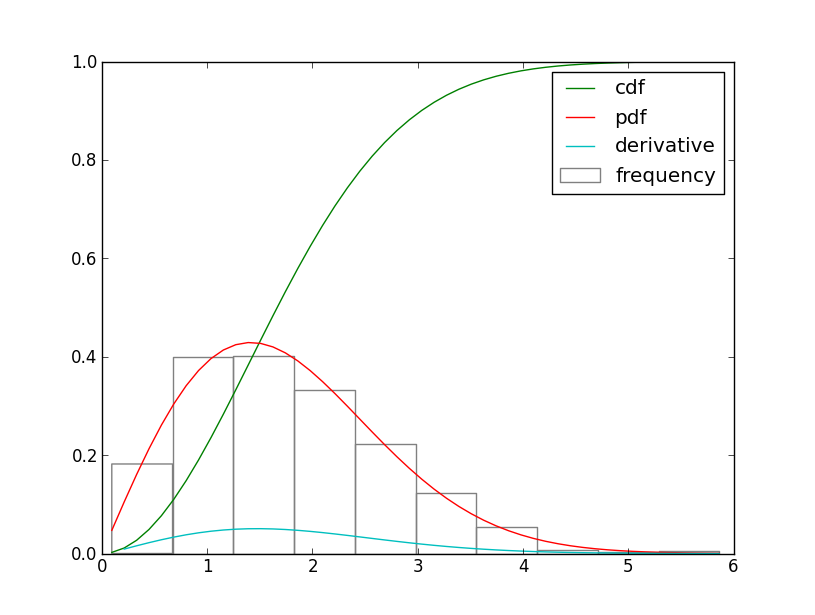

# Linear Regression 

* It is trying to create a best fit line which is near to all data points 

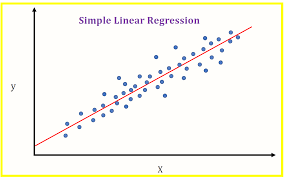

* If our linear model is overfitting means model gives good accuracy with test data and good accuracy with train data or model with Low bias and High varience then ridge and lasso regression is used .

* Here we do not have any difference between the best fit line and the data point which will led to overfitting .
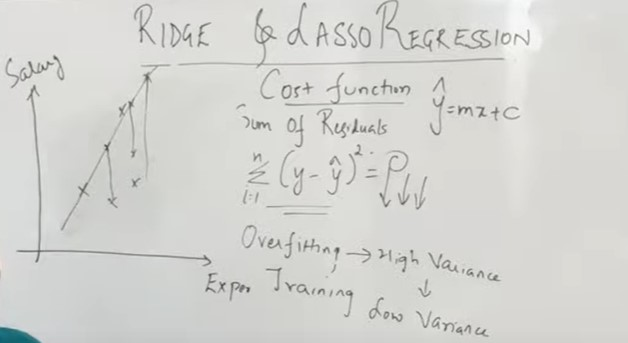

__Ridge and Lasso Regression :__

* These are the hyperparameters
*  Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression

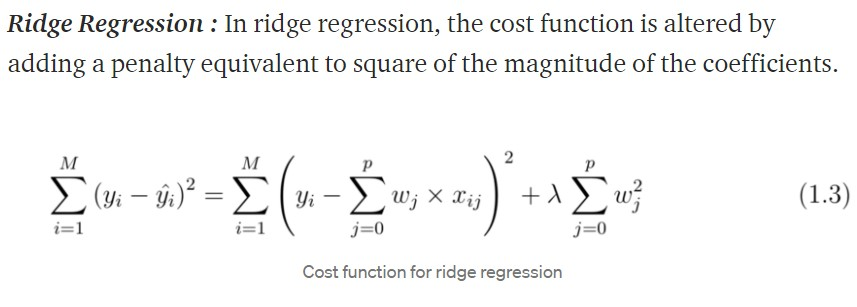

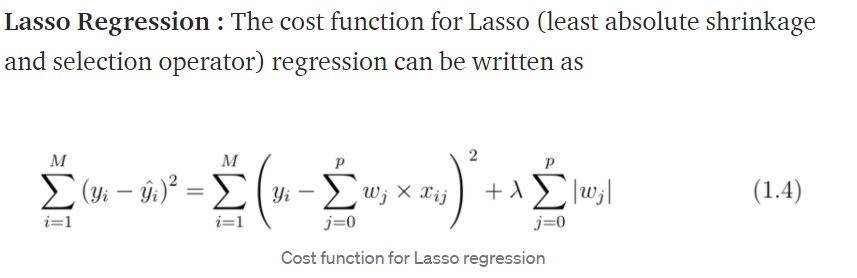

In [19]:
# Practical Implementation

from sklearn.datasets import load_boston

df = pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
df['Price'] = load_boston().target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
# Divide the dataset into dependent and independint features

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [46]:
# Linear Regression 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
mse = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)
print('Mean Squared Error :\n',mse)
mean_mse = np.mean(mse)
print('Mean values of 5 MSEs:\n',mean_mse)
print('\n')

# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
print(ridge_regressor.fit(X,y))
print('\n')
print('Best Parameter with Ridge Regression :\n',ridge_regressor.best_params_)
print('Best MSE Score with Ridge Regression:\n',ridge_regressor.best_score_)

# Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
print(lasso_regressor.fit(X,y))
print('\n')
print('Best Parameter with lasso Regression :\n',lasso_regressor.best_params_)
print('Best MSE Score with lasso Regression:\n',lasso_regressor.best_score_)

Mean Squared Error :
 [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
Mean values of 5 MSEs:
 -37.13180746769922


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')


Best Parameter with Ridge Regression :
 {'alpha': 100}
Best MSE Score with Ridge Regression:
 -29.905701947540372


D:\Tensorflow\py3-TF2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
D:\Tensorflow\py3-TF2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
D:\Tensorflow\py3-TF2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
D:\Tensorflow\py3-TF2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objecti

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')


Best Parameter with lasso Regression :
 {'alpha': 1}
Best MSE Score with lasso Regression:
 -35.531580220694856


> Note : Lasso Performs well when we have many no. of features  

Shapes :
 (354, 13) (152, 13) (354,) (152,)


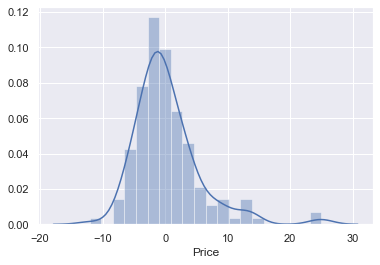

In [78]:
# Perform Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Shapes :\n',X_train.shape,X_test.shape,y_train.shape,y_test.shape)

# Predictions

pred_ridge = ridge_regressor.predict(X_test)
pred_lasso = lasso_regressor.predict(X_test)

# Plot a distplot

import seaborn as sns

sns.distplot(y_test-pred_ridge);

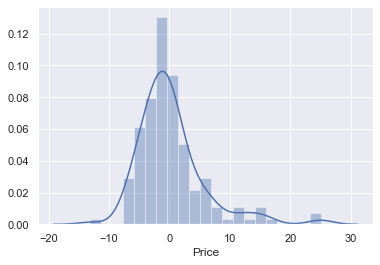

In [79]:
sns.distplot(y_test-pred_lasso);

### Multiple Linear Regression :

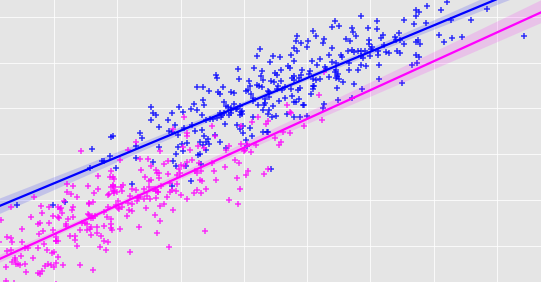

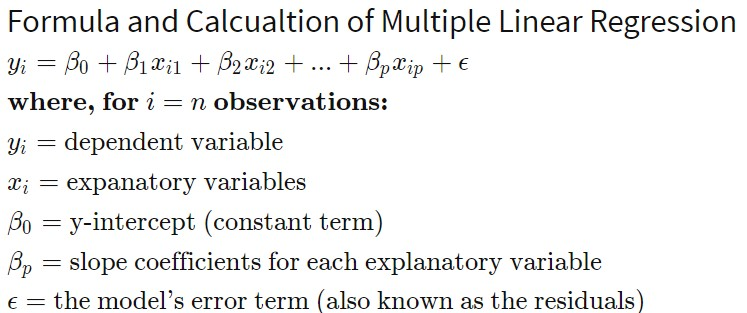

In [85]:
data = 'https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/50_Startups.csv'
df = pd.read_csv(data)

# Divide into dependent and independent variables

X = df.iloc[:,:-1]
y = df.iloc[:,4]

# Convert state column into categorical column

states = pd.get_dummies(X['State'],drop_first=True)

# Drop the state column

X = X.drop('State',axis=1)

# Concinate the dummy state variable 

X = pd.concat([X,states],axis=1)

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear regerssion model

reg = LinearRegression()
reg.fit(X_train,y_train)

# Predicting the test set results

y_pred = reg.predict(X_test)

# Model evaluation

from sklearn.metrics import r2_score
print('R2 Score :',r2_score(y_test,y_pred))

R2 Score : 0.9347068473282423


__R2 Socre :__

* R^2 (pronounced r-squared) or coefficient of determination .
* It Compares your models predictions to the mean of the targets. 
* Values can range from negative infinity (a very poor model) to 1. 
* In the above case the r2 value is 0.93 which means the model which we have designed is a good model .

__Covariance :__

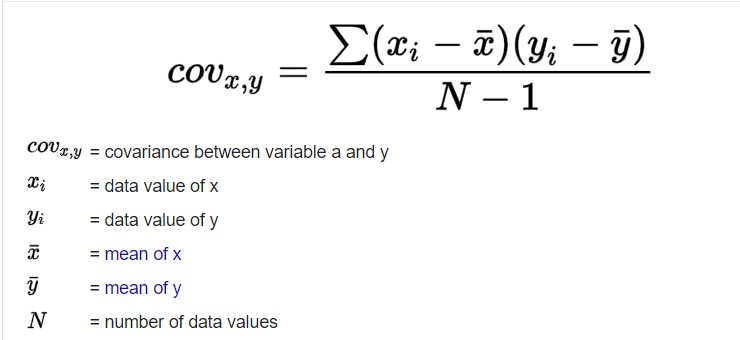

* Covariance measures the directional relationship between the returns on two assets. A positive covariance means that asset returns move together while a negative covariance means they move inversely

* However, it does not indicate the strength of the relationship, nor the dependency between the variables.

__Correlation :__

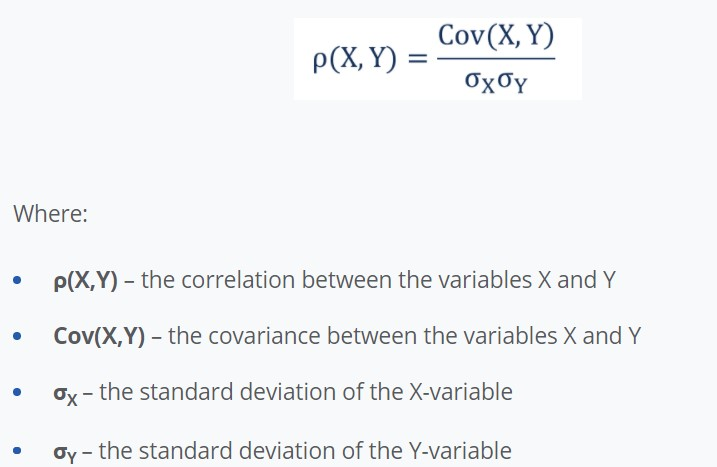

*  correlation measures the strength of the relationship between variables. Correlation is the scaled measure of covariance. It is dimensionless. In other words, the correlation coefficient is always a pure value and not measured in any units.

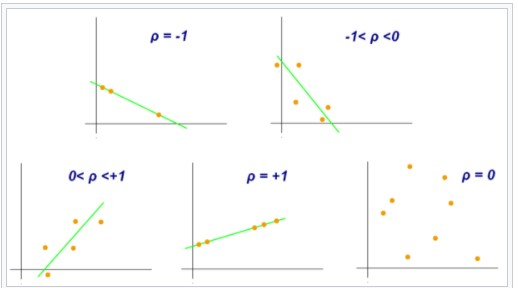

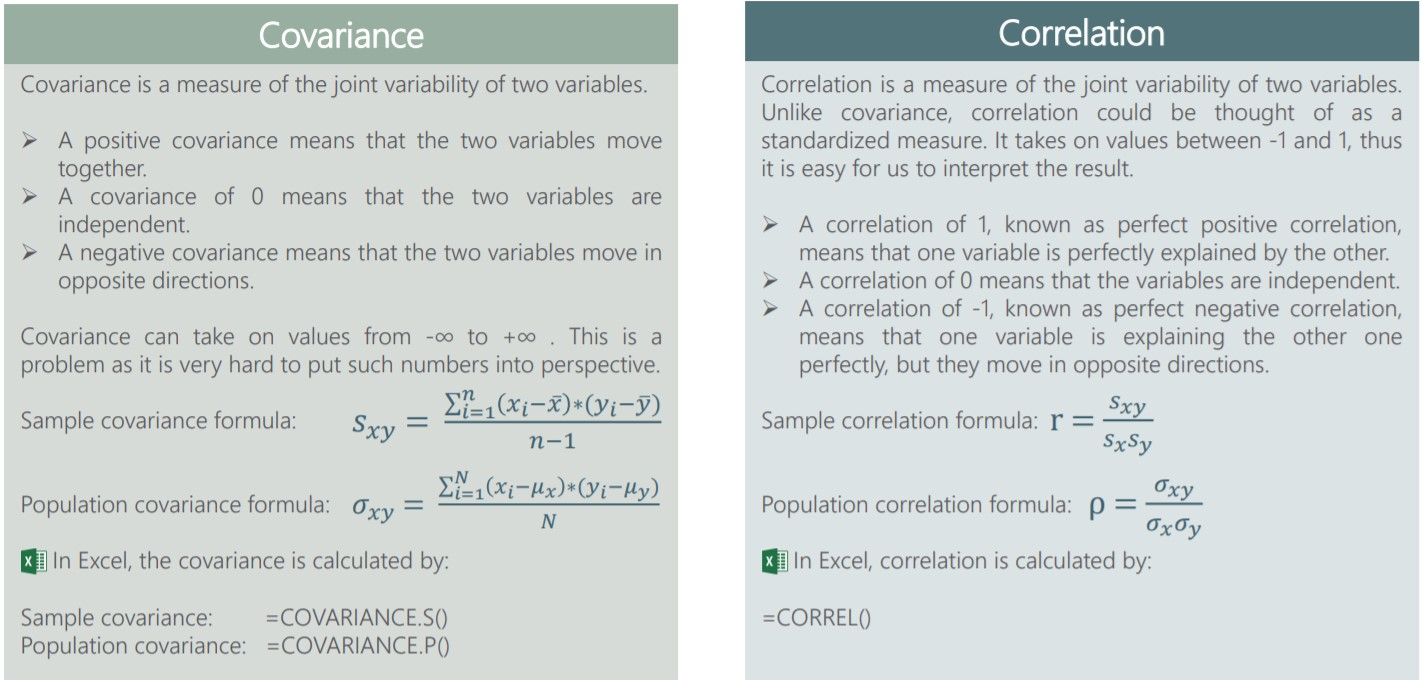

> __Note : In ML Feature Selection if the correlation coefficient is 1 that means the two features are same so we can drop one of the feature .__

__Spearman's Rank-Order Correlation :__

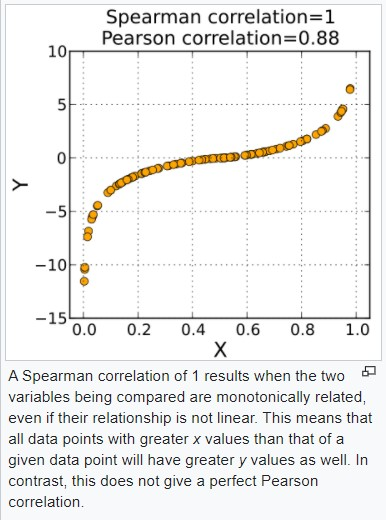

* If the data is not increasing linearly then we can use spearman's rank order correlation

* Here we are finding pearson correlation of rank of x and rank of y

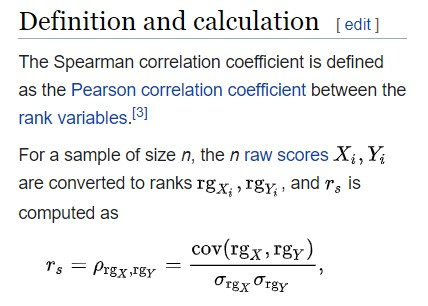

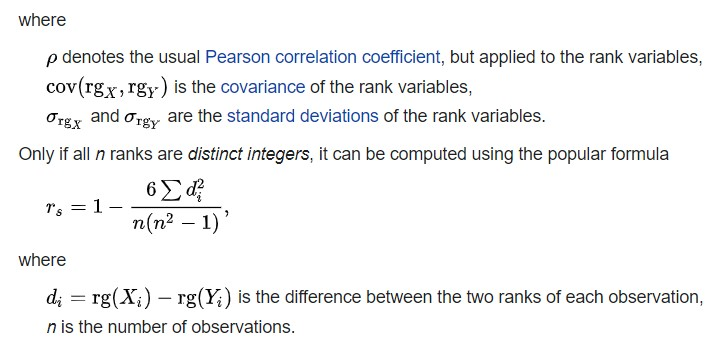

* Eg. https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient

> __Note : When we use corr() or plot a heatmap then the technique used behind it is Spearman's Rank correlation .__ 

### Multicollinearity in Linear Regression|

In [18]:
#!pip install statsmodels
import pandas as pd
import statsmodels.api as sm

data = 'https://raw.githubusercontent.com/krishnaik06/Multicollinearity/master/data/Advertising.csv'
df = pd.read_csv(data,index_col=0)

# Dependent and Independent var  

X = df.drop('sales',axis=1)
y = df['sales']

__Ordinary Least Square Method (OSL) :__

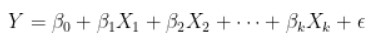

* Here beta0 will considered as a constant  



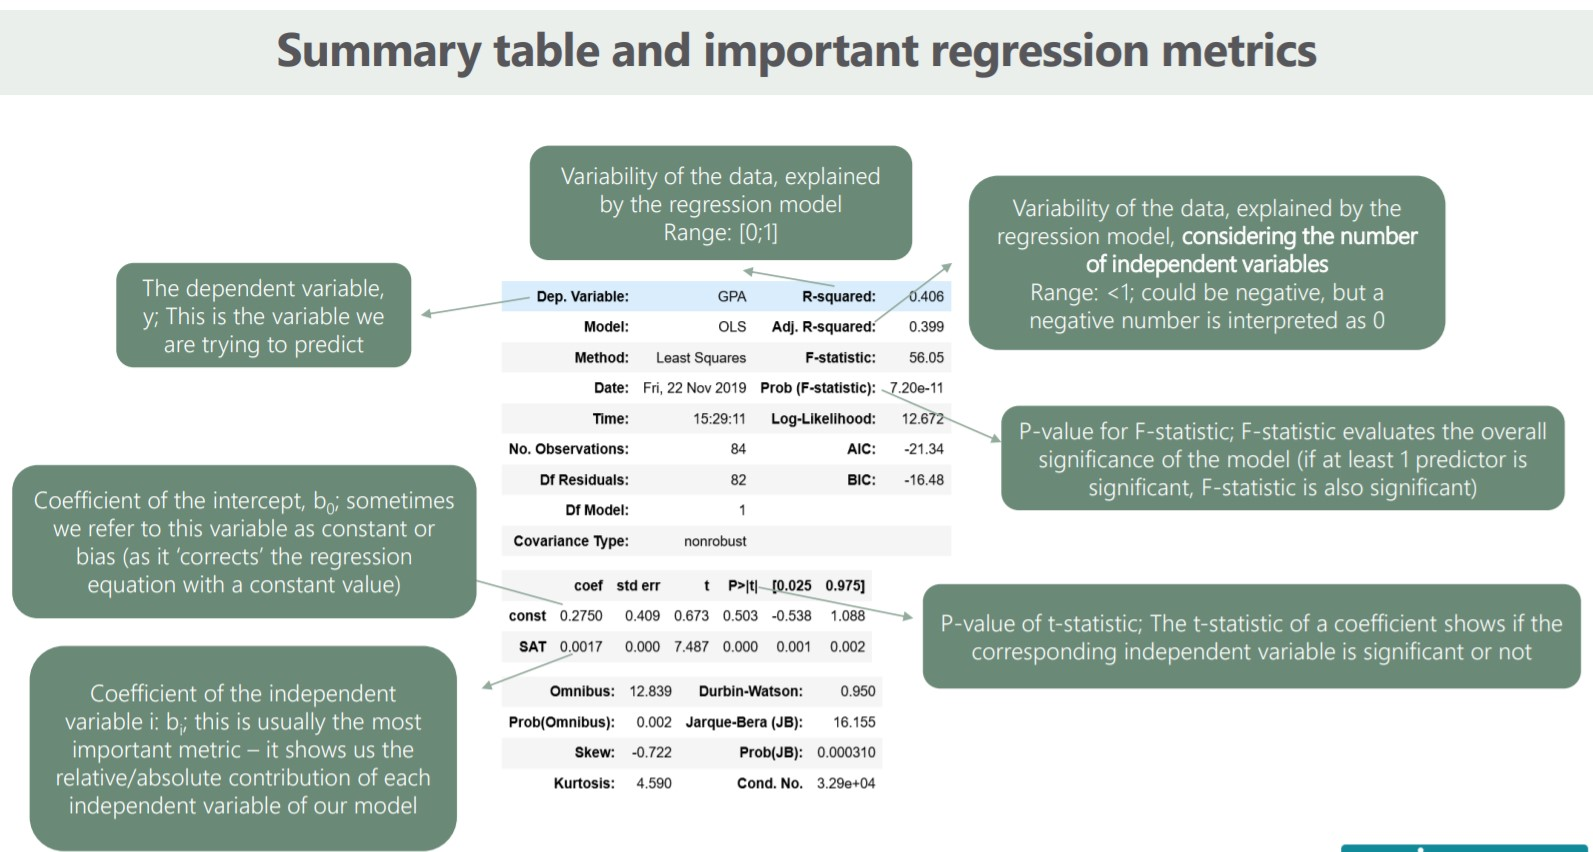

In [22]:
# Add a constant in X

X = sm.add_constant(X)

# Fit a OLS model with intercept on TV and Radio

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        12:36:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Here there is no issues of multicollinierity

In [37]:
# Find the correlation 
X.iloc[:,1:].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


* Here we can see there is no much correlation between the independet Features .
* Because the values are less then 0.5 .

Example of high correlation :

In [42]:
data = 'https://raw.githubusercontent.com/krishnaik06/Multicollinearity/master/data/Salary_Data.csv'

df_salary = pd.read_csv(data)
df_salary

X = df_salary.drop('Salary',axis=1)
y = df_salary['Salary']

# Add a constant in X

X = sm.add_constant(X)

# Fit a OLS model with intercept on TV and Radio

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Fri, 06 Nov 2020   Prob (F-statistic):           1.35e-19
Time:                        12:57:02   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     -0.292      0.773   -5.35e+04    4.02e+04
YearsExperience  6153.3533   2337.092      2.633      0.014    1358.037    1.09e+04
Age              1836.0136   1285.034      1.429      0.165    -800.659    4472.686
==============================================================================
Omnibus:                        2.695   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.975
Skew:                           0.456   Prob(JB):                        0.372
Kurtosis:                       2.135   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Bias and Varience

* Bias => The error in the training data
* Varience => The error in the test data

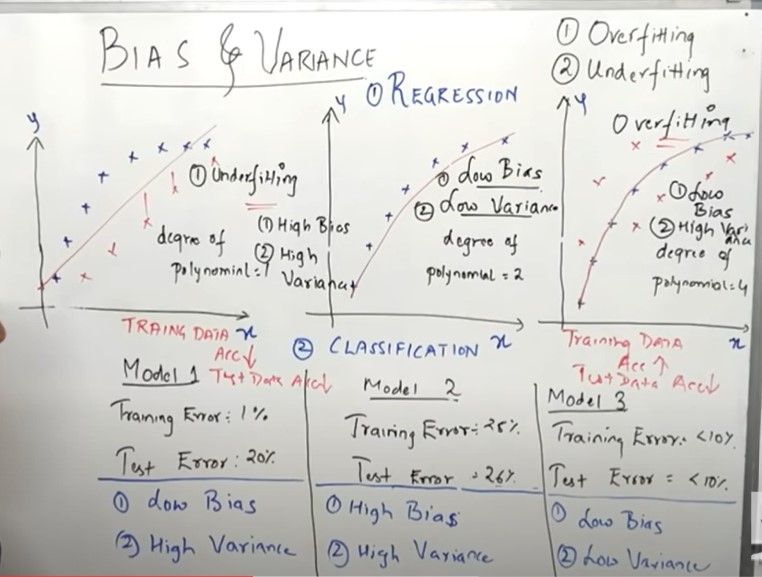

### R Square and Adjusted R Square

* R Square stands for Residual Sum of Squares .
* Here Residual for a point in the data is the difference between the actual value and the value predicted by our linear regression model.
* R-squared and Adjusted R-squared are two evaluation metrics used with regression problems .


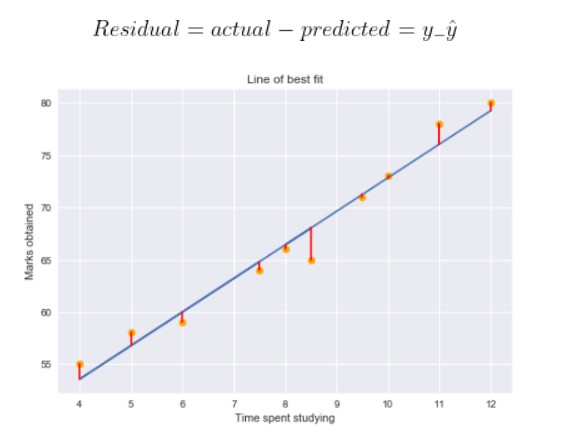

* The yellow dots represent the data points and the blue line is our predicted regression line. As you can see, our regression model does not perfectly predict all the data points. So how do we evaluate the predictions from the regression line using the data? Well, we could start by determining the residual values for the data points.

R Squared :

* The R-Squared measures how much of the total variability is explained by our model .

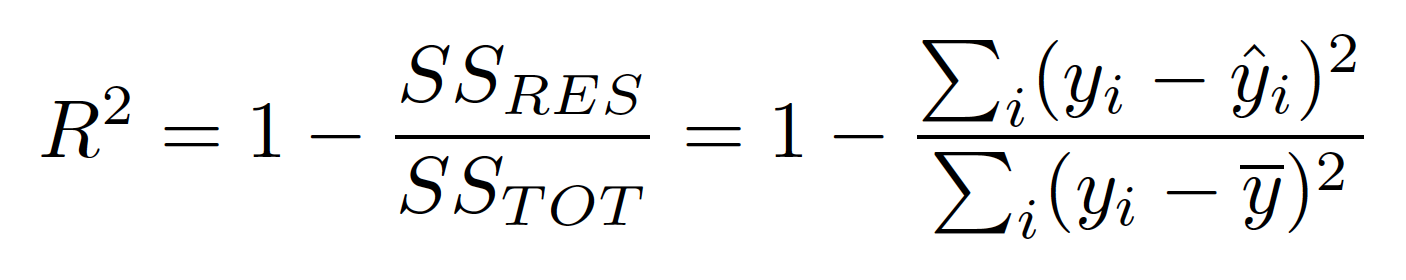


* The value of R square will be in between 0 to 1 the more the value nearer to 1 the line is best fitted to the model .

* If the best fitted line is worder then the average then the R squared value can be lesser then 0 .

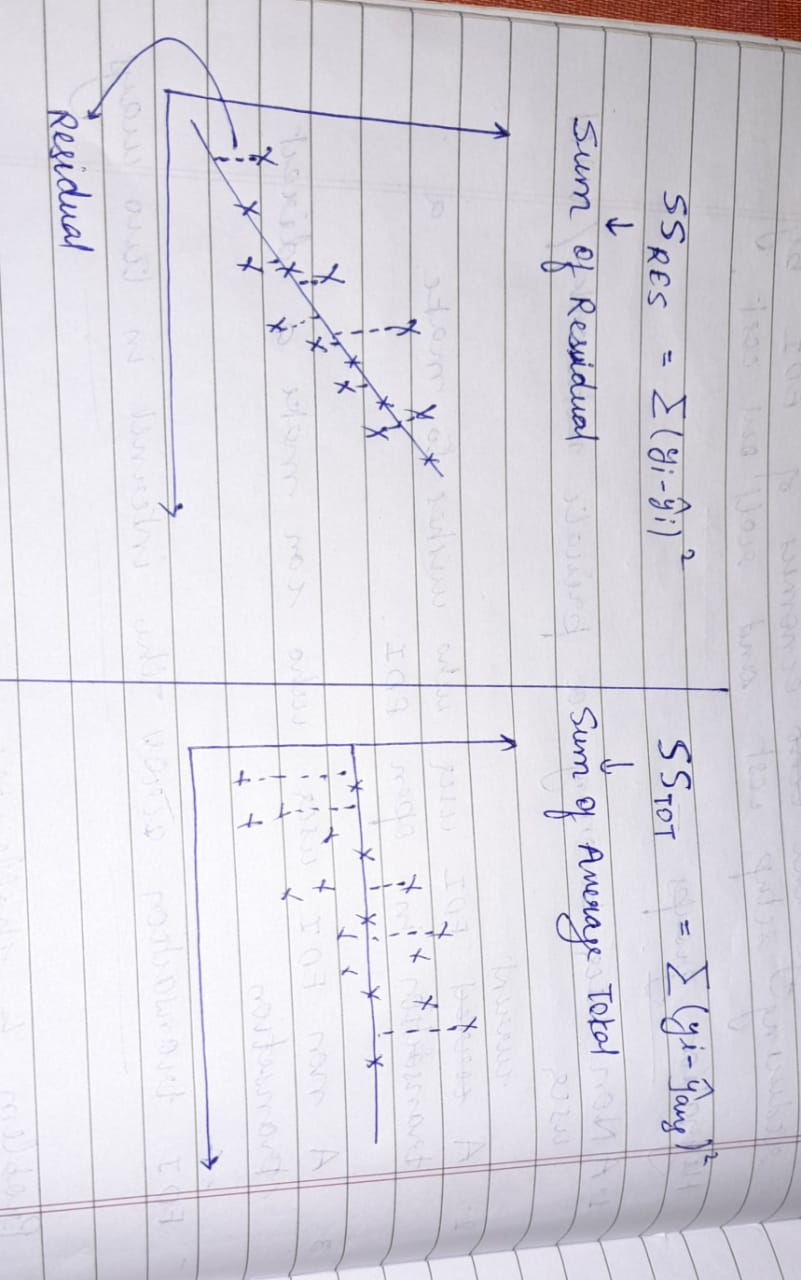
* Multiple regressions are always better thann simple ones , as with each additional variable we add, the explanatory power may only increase or stay the same .

> Problems with R - Squared : As we add more independent features the R-Squared value usually increases and will never decrease , even if the newely added feature is not correlated with the tearget o/p that indicates that it is not penalizing the newly added feature .
  
Adjusted R Squared :

* It penalizes attributes which are not correlated 

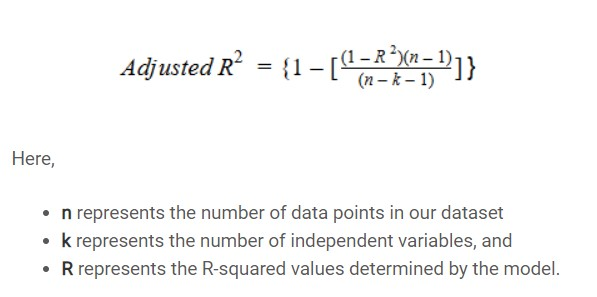

> As you can see, adding a random independent variable did not help in explaining the variation in the target variable. Our R-squared value remains the same. Thus, giving us a false indication that this variable might be helpful in predicting the output. However, the Adjusted R-squared value decreased which indicated that this new variable is actually not capturing the trend in the target variable.

> Clearly, it is better to use Adjusted R-squared when there are multiple variables in the regression model. This would allow us to compare models with differing numbers of independent variables.

## Hypothisis Testing

* Statistics is all about data , a huge amount of data but that data is usefull only if we analyse it properly and derive conculsitions from it .
* In order to derive such important conclusions and interpretatons we use hupothisis testing .

* Here we evaluate 2 mutually exclusive statement on population using a sample of data .



Steps in Data Driven Decision making :
1. Make Initial Assumption (H0)
2. Collect Data 
3. Gather evidence to reject or not to reject Null hypothisis .


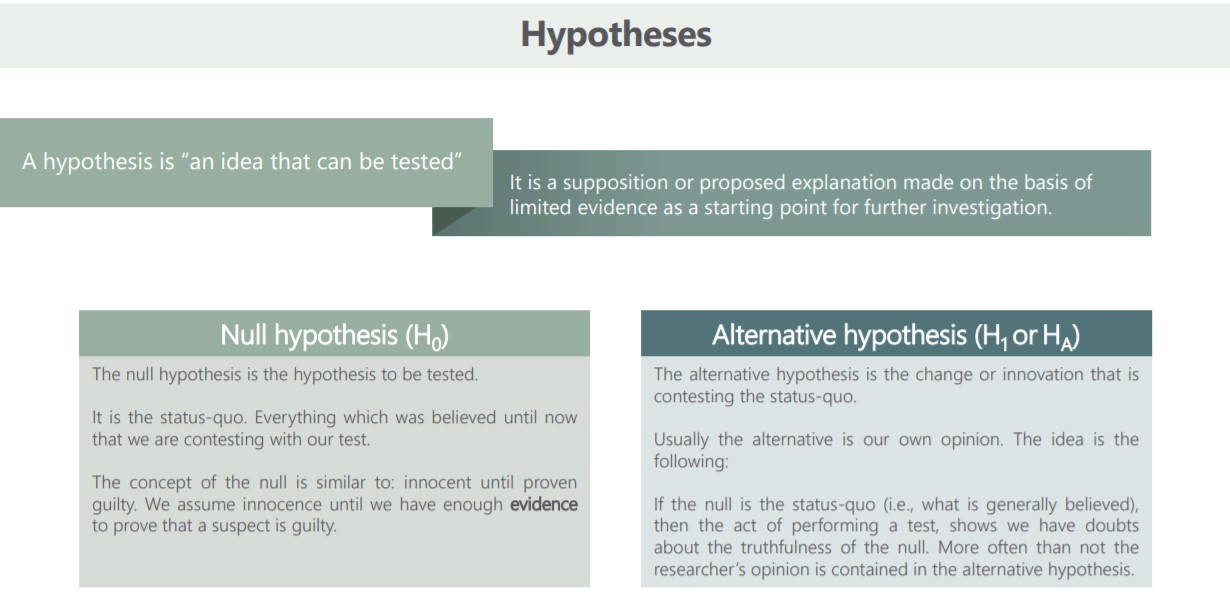

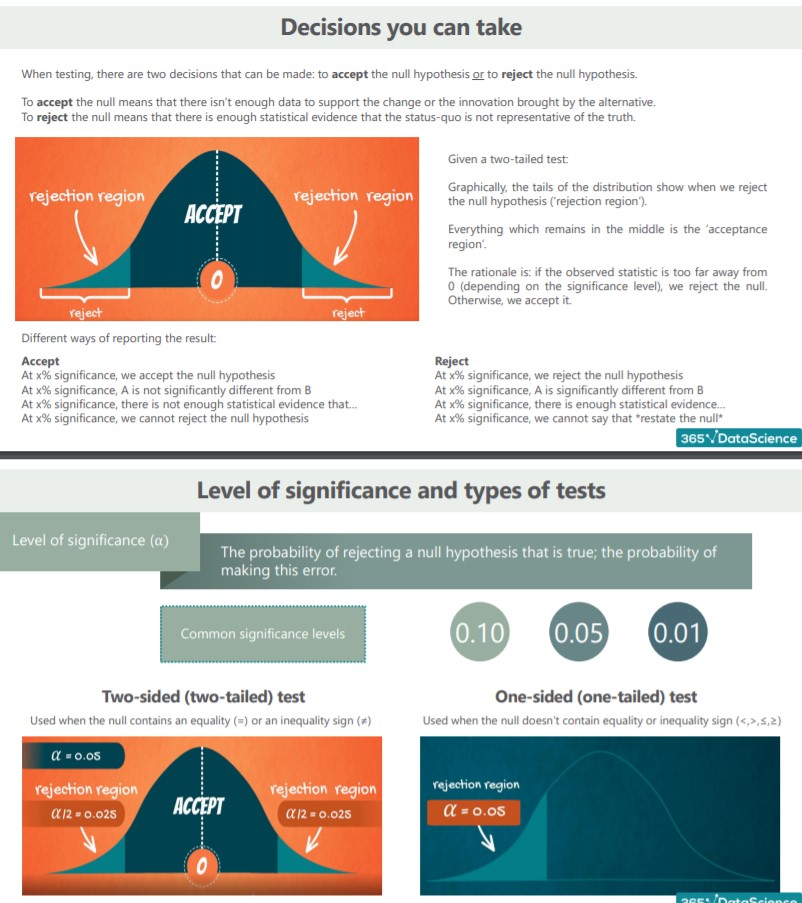

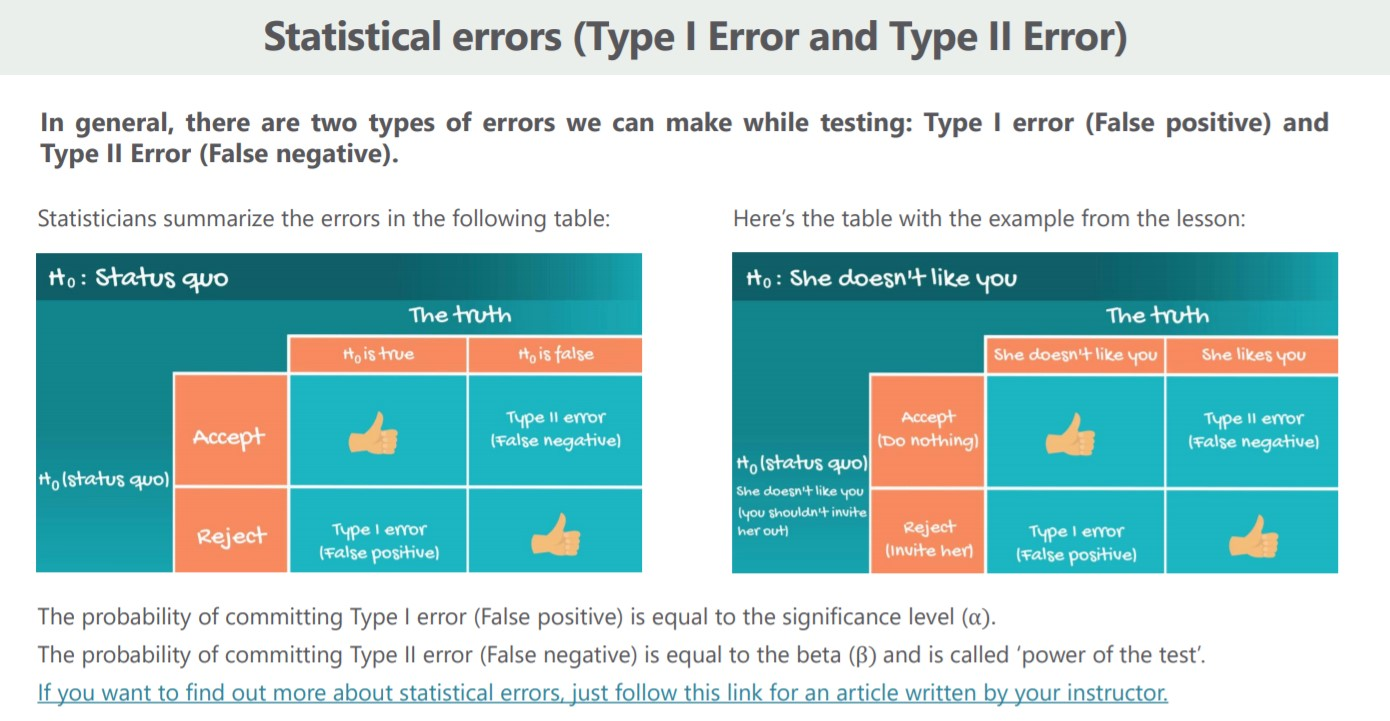

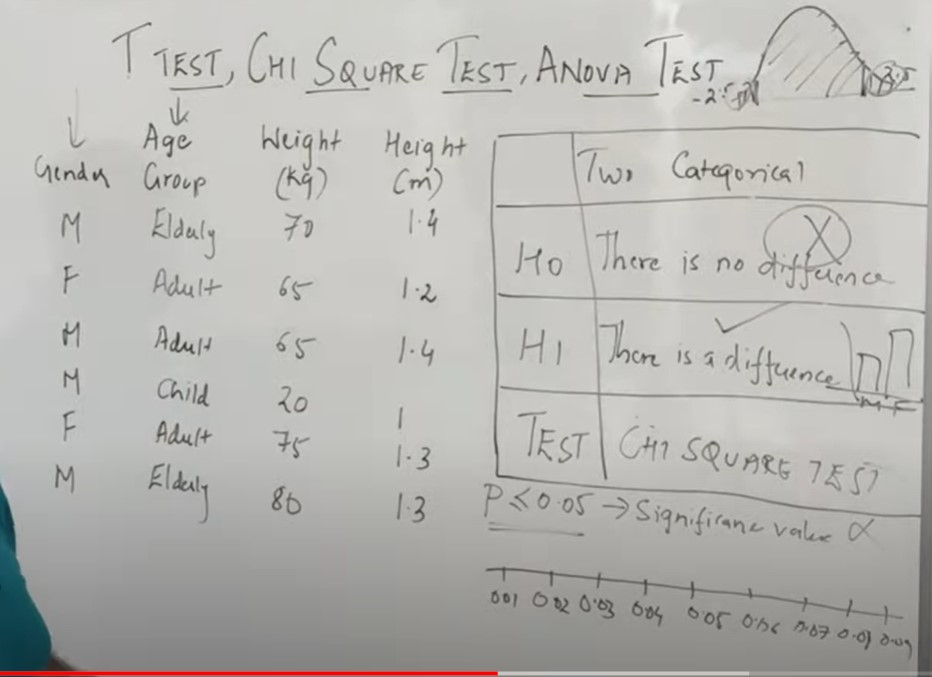

Eg. Is there a difference between male and female based on age group .

* If we have two categories then we will use chi square test 

* If we have one categorical feature then we will apply one sample proportion test .

* If we have one continous variable then we will use T test

* If we have two continous variable then we apply correlation .

* If we have one continous and one categorical or two categorical we will apply Anova test .

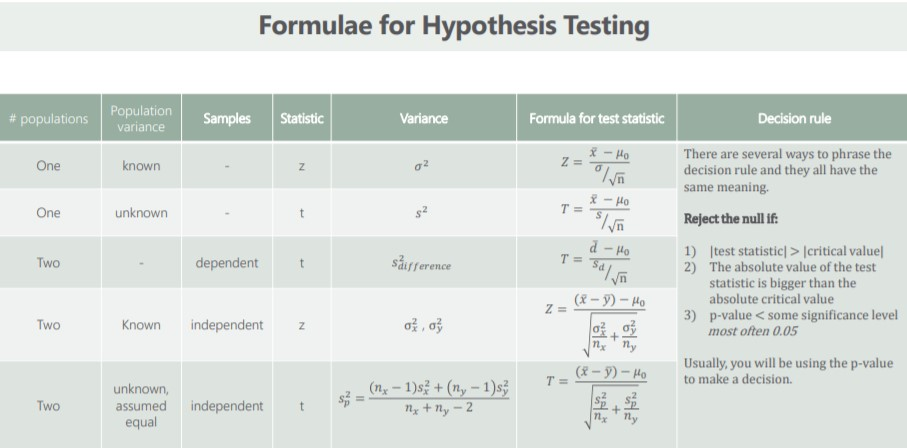

## T Test

* A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

* T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test .

__One Sample T Test :__

* The test will tell us whether means of the sample and the population are different

In [6]:
# Eg. Taking some random age of people form entire class as a population  

ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

import numpy as np
ages_mean=np.mean(ages)
print('Population mean of ages:',ages_mean)

# Let's take sample
# Choosing 10 ages randomly

sample_size = 10
age_sample = np.random.choice(ages,sample_size)
print('Sample ages :',age_sample)

# Perform One sample T Test

from scipy.stats import ttest_1samp

ttest,p_value = ttest_1samp(age_sample,30)
print('P value of ages :',p_value)

# Condition for Null null hypothisis

if p_value < 0.05:
    print('Reject the null Hypothisis')
else:
    print('Accept the null Hypothisis')

Population mean of ages: 30.34375
Sample ages : [50 35 18 16 26 65 17 35 16 21]
P value of ages : 0.9852076017773327
Accept the null Hypothisis


In [13]:
# Eg. Consider the age of students in a college and in class A

import numpy as np
import pandas as pd
import scipy.stats as stats
import math

np.random.seed(6)
school_ages = stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages = stats.poisson.rvs(loc=18,mu=30,size=60)

print('School ages mean :',np.mean(school_ages))
print('ClassA ages mean :',np.mean(classA_ages))

_,p_value = stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())
print('P value :',p_value)

# Condition for Null null hypothisis

if p_value < 0.05:
    print('Reject the null Hypothisis')
else:
    print('Accept the null Hypothisis')

School ages mean : 53.303333333333335
ClassA ages mean : 46.9
P value : 1.139027071016194e-13
Reject the null Hypothisis


__Two Sample T Test :__

* The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

In [17]:
# Eg. Consider the age of students in a college and in class A and class B

np.random.seed(6)
school_ages = stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages = stats.poisson.rvs(loc=18,mu=30,size=60)
classB_ages = stats.poisson.rvs(loc=18,mu=33,size=60)

print('School ages mean :',np.mean(school_ages))
print('ClassA ages mean :',np.mean(classA_ages))
print('ClassB ages mean :',np.mean(classB_ages))

_,p_value=stats.ttest_ind(a=classA_ages,b=classB_ages,equal_var=False)
print('P value :',p_value)

# Condition for Null null hypothisis

if p_value < 0.05:
    print('Reject the null Hypothisis')
else:
    print('Accept the null Hypothisis')

School ages mean : 53.303333333333335
ClassA ages mean : 46.9
ClassB ages mean : 50.68333333333333
P value : 0.00030935839774215933
Reject the null Hypothisis


__Paired T Test :__ 

* When you want to check how different samples from the same group are, you can go for a paired T-test

In [22]:
# Eg. Weights of school kids 

weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

print('Weight 1 :\n',weight1)
print('Weight 2 :\n',weight2)

# Creating DF of weight and changes weight

weight_df = pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                         "weight_change":np.array(weight2)-np.array(weight1)
                         })

weight_df

Weight 1 :
 [25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
Weight 2 :
 [24.9578879  24.39797591 23.39762859 32.13440974 23.88843217 36.71467662
 30.890604   26.45155032 23.42473547 26.46373833 22.02137076 36.68018614
 35.67279819 29.43885239 43.85117946]


,weight_10,weight_20,weight_change
0,25,24.957888,-0.042112
1,30,24.397976,-5.602024
2,28,23.397629,-4.602371
3,35,32.134410,-2.865590
4,28,23.888432,-4.111568
5,34,36.714677,2.714677
6,26,30.890604,4.890604
7,29,26.451550,-2.548450
8,30,23.424735,-6.575265
9,26,26.463738,0.463738


In [23]:
_,p_value=stats.ttest_ind(a=weight1,b=weight2)
print('P value :',p_value)

# Condition for Null null hypothisis

if p_value < 0.05:
    print('Reject the null Hypothisis')
else:
    print('Accept the null Hypothisis')

P value : 0.6009974123094772
Accept the null Hypothisis


__Correlation :__

In [26]:
import seaborn as sns
df = sns.load_dataset('iris')
print('Shape :',df.shape)

# Calculate the correlation between the features of iris dataset
df.corr()

Shape : (150, 5)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


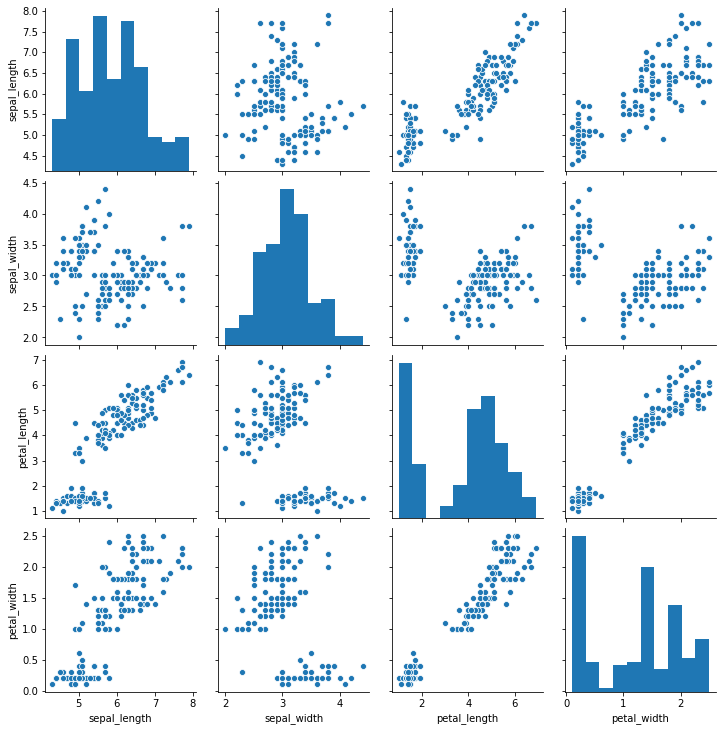

In [27]:
# PLot the correlation with pair plot

sns.pairplot(df)

__Chi Squared Test :__

* The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

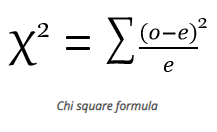

In [32]:
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('tips')
print('Shape :',df.shape)
df.head()

Shape : (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
df_table = pd.crosstab(df['sex'],df['smoker'])
df_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [36]:
# Observed Value

Observed_Values = df_table.values
print('Observed Values :\n',Observed_Values)

val = stats.chi2_contingency(df_table)
val

Observed Values :
 [[60 97]
 [33 54]]


(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [37]:
Excepted_values = val[3]
Excepted_values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [43]:
from scipy.stats import chi2

chi_square = sum([(o-e)**2./e for o,e in zip(Observed_Values,Excepted_values)])
chi_square_statistic=chi_square[0]+chi_square[1]

print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623
